## Reading the files

In [35]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
# Print the first 5 lines
filename = "../data/Beta_all_cpgs_EPIC_QuantileNormalized.txt"
with open(filename, 'r') as file:
        idx = 5
        for line in file:
            idx = idx - 1
            s = line.strip()
            print(s)  # .strip() removes any extra whitespace and newline characters
            if (idx < 0):
                  break

"Sites"	"X4033965402"	"X4033964727"	"X4033964893"	"X4033965028"	"X4033965193"	"X4033965111"	"X4033965562"	"X4033965006"	"X4033964886"	"X4033964857"	"X4033965476"	"X4033964733"	"X4033965283"	"X4033964726"	"X4033965538"	"X4033965372"	"X4033965375"	"X4033965373"	"X4033965194"	"X4033964807"	"X4033964767"	"X4033964828"	"X4033965278"	"X4033964637"	"X4033964804"	"X4033964839"	"X4033965347"	"X4033965423"	"X4033964678"	"X4033965219"	"X4033965048"	"X4033964902"	"X4033965336"	"X4033965186"	"X4033964966"	"X4033965000"	"X4033964683"	"X4033965182"	"X4033965475"	"X4033965158"	"X4033964700"	"X4033964624"	"X4033964871"	"X4033964704"	"X4033965015"	"X4033964642"	"X4033964640"	"X4033964651"	"X4033964699"	"X4033964818"	"X4033964823"	"X4033965348"	"X4033964671"	"X4033965578"	"X4033964896"	"X4033965014"	"X4033964645"	"X4033965387"	"X4033964719"	"X4033964666"	"X4033964707"	"X4033965386"	"X4033964898"	"X4033964884"	"X4033964977"	"X4033964805"	"X4033964938"	"X4033964840"	"X4033965484"	"X4033964747"	"X4033965290

CpG sites are marked cg07881041, cg23229610, and so forth The samples are given by X4033965402, X4033964727, and so forth. 
The degree of methylation is indicated in the cells for each combination of (sampleID, site)

In [3]:
def read_line_by_line(file_name):
    data = {}
    with open(file_name, 'r') as file:
        for line in file:
            s = line.strip()
            arr = s.split()
            if len(arr) > 1:
                column_name = arr[0]
                values = arr[1:]
                if column_name in data:
                    print("Duplicate col")
                    data[column_name].extend(values)
                else:
                    data[column_name] = values
            elif len(arr) == 1:
                # Handles the case where there is a column name but no data following it
                data[arr[0]] = []
    
    # Create DataFrame from the dictionary
    df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))
    return df

In [4]:
df = read_line_by_line(filename)
df

,"""Sites""","""cg07881041""","""cg23229610""","""cg03513874""","""cg05451842""","""cg14797042""","""cg09838562""","""cg25458538""","""cg09261072""","""cg02404579""",...,"""cg22005990""","""cg05384275""","""cg21496658""","""cg27017993""","""cg19551589""","""cg10218605""","""cg06899844""","""cg22494081""","""cg22623303""","""cg21064505"""
0,"""X4033965402""",0.915498965150752,0.87617589846615,0.912604526863284,0.115953545232274,0.954318328188501,0.0541909732883021,0.943943768230694,0.712611833745956,0.859575348780327,...,0.246486675607907,0.0211660044481096,0.033645422071818,0.891089239363875,0.0424794207137297,0.414216055058653,0.0824607736523225,0.951736964587792,0.969828885242608,0.972860484314805
1,"""X4033964727""",0.91490727532097,0.889321221446325,0.905538157551355,0.127751597701891,0.943288897110682,0.046287947099489,0.928079511098664,0.698339364638908,0.872387525229507,...,0.199868401306752,0.019621727154031,0.0319029909546472,0.886485014448462,0.039433198932984,0.435600357000104,0.0992961991357427,0.96094452086199,0.979119948743765,0.96949125610219
2,"""X4033964893""",0.907215384394433,0.901977575844078,0.897193304756073,0.0971812713763416,0.939867393159588,0.0693267248380849,0.929632992811199,0.68452908877951,0.834511154016144,...,0.212202424207191,0.0300096419720622,0.0288632168871359,0.901537335285505,0.0342025133443837,0.395688842459296,0.0845575973190604,0.956896162630101,0.977785617427541,0.965334044742559
3,"""X4033965028""",0.906710755534952,0.909132199733159,0.931954629272267,0.0992238646799182,0.933466423044822,0.0811572052401747,0.927342757000347,0.713423926847854,0.829575259346252,...,0.144275499002299,0.0202078610969761,0.0243598404126282,0.878899909828674,0.0639478088601974,0.54638477700882,0.106364185081043,0.938898545203457,0.966567699288555,0.986423650001697
4,"""X4033965193""",0.901751353587283,0.925119806905649,0.916890024070045,0.101208801892601,0.97285470164419,0.0483310367521543,0.919047211435953,0.73110264080543,0.827737205655926,...,0.161908619572262,0.0194475943625466,0.0314453871436215,0.890523277238668,0.0560968183894048,0.538422345184596,0.0902273930651555,0.942993538335547,0.971178184757408,0.967483670942312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""X4033963319""",0.89478417266187,0.893894532258309,0.915421751652405,0.0984704732332816,0.944053765355172,0.0471134112608191,0.923310569105691,0.687794337824963,0.837861516446504,...,0.228716366367133,0.023984644665957,0.0528622059929116,0.883416087388282,0.00104806544586451,0.44745669615709,0.0841719069040976,0.954162265579847,0.973953303570936,0.985908689641388
92,"""X4033963470""",0.908012648786074,0.890609461571246,0.922067754290188,0.0965320040368207,0.952695895411822,0.0668455221282435,0.921016410044288,0.700539397717724,0.869174463134422,...,0.237384896763894,0.0253174975513799,0.0651921685155332,0.896153665303052,0.0509790949986769,0.460084370772864,0.0887353706111834,0.955886155253684,0.980833402605422,0.973318501321984
93,"""X4033963187""",0.920080630817573,0.900941958297769,0.92596050833964,0.114469483715737,0.923798466543285,0.0749981341095438,0.923445414262668,0.691199053361431,0.830739978689789,...,0.188518459626744,0.0204957454679985,0.030569303262899,0.90267743840384,0.0496815203316897,0.54985070934149,0.104780429628157,0.951692059771462,0.973529063305708,0.981080529030281
94,"""X4033963311""",0.899854085092535,0.890418164285088,0.917419104824646,0.0700625214472836,0.93895560621372,0.0624757302498166,0.915047682150548,0.697162595608191,0.849340147243108,...,0.200786283221034,0.0291068179178443,0.032895654735145,0.900178983754833,0.102762687976355,0.523052814188605,0.0803508484301992,0.954559384037846,0.974884092557743,0.967592999736171


In [5]:
df.shape

(96, 866239)

In [6]:
# Read the file with the fasting data
filename_aging = "../data/Buchinger_results_all.xlsx"
df_aging = pd.read_excel(filename_aging)

In [7]:
df_aging

,ID.Patient,ID_Primary_sample,Samples,Nb.sites,Timepoint,Sex.prediction,Ethnicity.prediction,Sex,Score.horvath,Score GKM age,Value.Smoking.position.population,Value.Equivalent.cigarettes,Value.Diet.position.population,Value.Equivalent.fruits.vegis,Value.Alcohol.position.population,Value.Equivalent.alcohol.units,Value.Activity.position.population,Value.Equivalent.minutes.of.activity
0,B__001,VB_0000000592,4033965402,866238,1,Correct,WHITE,Male,43.3,52.640,24,0,41,4.0,53,4,77,540
1,B__001,VB_0000000593,4033964727,866238,2,Correct,WHITE,Male,44.0,53.450,14,0,42,4.0,43,2,39,120
2,B__001,VB_0000000594,4033964893,866238,3,Correct,WHITE,Male,46.5,51.700,21,0,41,4.0,35,1,74,540
3,B__002,VB_0000000618,4033965028,866238,1,Correct,WHITE,Male,54.3,56.900,24,0,50,4.0,34,1,3,60
4,B__002,VB_0000000619,4033965193,866238,2,Correct,WHITE,Male,55.4,64.100,20,0,10,2.0,58,6,25,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,B__032,VB_0000000741,4033963319,866238,2,Correct,WHITE,Male,41.2,46.470,7,0,35,3.5,29,0,30,90
92,B__032,VB_0000000742,4033963470,866238,3,Correct,WHITE,Male,42.4,44.099,10,0,41,4.0,36,1,25,90
93,B__033,VB_0000000743,4033963187,866238,1,Correct,WHITE,Male,27.1,35.300,0,0,41,4.0,35,1,24,90
94,B__033,VB_0000000744,4033963311,866238,2,Correct,WHITE,Male,33.9,33.400,9,0,50,4.0,42,2,26,90


In [8]:
df_aging['Samples'] = df_aging['Samples'].apply(lambda x: 'X' + str(x)) # To ensure they are the same as the Sites column in 
df.rename(columns={col: col.replace('"', '').replace("'", "") for col in df.columns}, inplace=True)
df.rename(columns={'Sites': 'Samples'}, inplace=True)

In [21]:
df = df.replace('"', '', regex=True)

In [23]:
df.to_csv("methylation.csv", index=False)

In [24]:
merged_df = pd.merge(df, df_aging, on='Samples', how='inner')

In [25]:
merged_df.to_csv("merged.csv", index=False)

In [2]:
merged_df = pd.read_csv("merged.csv")

In [3]:
[el for el in merged_df.columns.values if "age" in el]

['Score GKM age']

## Extracting relevant biomarkers

In [4]:
# For plotting style and resolution
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from cycler import cycler
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))
# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
plt.rc("axes", prop_cycle=line_cycler)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amssymb}\usepackage{mathtools}")
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=500)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=10, markeredgewidth=2.5)

In [21]:
# Only columns starting with 'cg' since these are the methylation data and the columns for color coding which are horvath age and fasting stage
cg_columns = [col for col in merged_df.columns if col.startswith('cg')]
ch_columns = [col for col in merged_df.columns if col.startswith('ch')]
relevant_columns = cg_columns + ch_columns + ['Timepoint', 'Score.horvath', 'Score GKM age']
data = merged_df[relevant_columns]

# Handle missing values if necessary
data.dropna(subset=cg_columns, inplace=True)  # assuming you want to drop rows with missing methylation data

C:\Users\amroa\AppData\Local\Temp\ipykernel_16856\3252201266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=cg_columns, inplace=True)  # assuming you want to drop rows with missing methylation data


In [22]:
data[['cg07881041']], data[['ch.4.37949012R']] 

(    cg07881041
 0     0.915499
 1     0.914907
 2     0.907215
 3     0.906711
 4     0.901751
 ..         ...
 91    0.894784
 92    0.908013
 93    0.920081
 94    0.899854
 95    0.895405
 
 [96 rows x 1 columns],
     ch.4.37949012R
 0         0.058647
 1         0.037005
 2         0.047220
 3         0.025824
 4         0.041793
 ..             ...
 91        0.034688
 92        0.043463
 93        0.051578
 94        0.039785
 95        0.025034
 
 [96 rows x 1 columns])

In [23]:
data.shape, merged_df.shape

((96, 866241), (96, 866256))

In [72]:
def compute_bioage_correlations(colnames):
    cg_gkm_corrs = {}
    cg_gkm_pvalues = {}
    cg_hor_corrs = {}
    cg_hor_pvalues = {}
    for column in colnames:
        # for GKM
        corr, p_val = scipy.stats.spearmanr(data[column], data['Score GKM age'])
        cg_gkm_corrs[column] = corr
        cg_gkm_pvalues[column] = p_val
        
        # for horvath
        corr, p_val = scipy.stats.spearmanr(data[column], data['Score.horvath'])
        cg_hor_corrs[column] = corr
        cg_hor_pvalues[column] = p_val

    return cg_gkm_corrs, cg_gkm_pvalues, cg_hor_corrs, cg_hor_pvalues

In [73]:
cg_columns = [col for col in data.columns if col.startswith('cg')]
ch_columns = [col for col in data.columns if col.startswith('ch')] # non-cgi

cg_gkm_corrs, cg_gkm_pvalues, cg_hor_corrs, cg_hor_pvalues = compute_bioage_correlations(cg_columns)
ch_gkm_corrs, ch_gkm_pvalues, ch_hor_corrs, ch_hor_pvalues = compute_bioage_correlations(ch_columns)

In [74]:
import json
with open('cg_gkm_corrs.json', 'w') as json_file:
    json.dump(cg_gkm_corrs, json_file, indent=4) 
with open('ch_gkm_corrs.json', 'w') as json_file:
    json.dump(ch_gkm_corrs, json_file, indent=4) 
with open('cg_hor_corrs.json', 'w') as json_file:
    json.dump(cg_hor_corrs, json_file, indent=4)  
with open('ch_hor_corrs.json', 'w') as json_file:
    json.dump(ch_hor_corrs, json_file, indent=4)  # 'indent' for pretty printing

In [75]:
def corr_distribution_plot(correlations, title):
    correlations = np.array(list(correlations.values()))
    mean = np.mean(correlations)
    std = np.std(correlations)
    print(f"{title}: {mean}")
    print(f"{title}: {std}")

    # Generate the kernel density estimate
    kde = sns.kdeplot(correlations, bw_adjust=0.5).get_lines()[0].get_data()
    kde_x = kde[0]
    kde_y = kde[1]

    # Plot the KDE curve
    #plt.figure(figsize=(50, 50))
    plt.plot(kde_x, kde_y, linestyle="solid", color='blue')

    # Add a vertical line for the mean
    plt.vlines(mean, 0, max(kde_y), colors='red', linestyle='dashed', linewidth=2, label='Mean')

    # Fill the area under the KDE curve within one standard deviation
    plt.fill_between(kde_x, kde_y, where=(mean - std <= kde_x) & (kde_x <= mean + std), color='grey', alpha=0.5, label='1 std. dev.')
    plt.fill_between(kde_x, kde_y, where=(mean - std+0.006 >= kde_x) | (kde_x >= -0.01+mean + std), color='blue', alpha=0.3) # to beautify plot, some errors were deliberately added


    # Add titles and labels
    plt.title('Distribution of CpG Correlations')
    plt.xlabel('Correlation Value')
    plt.ylabel('Density')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig(f"./plots/{title}.jpg")
    plt.show()

non_cgi_corr_hor: -0.012755970858787895
non_cgi_corr_hor: 0.1136545955221794


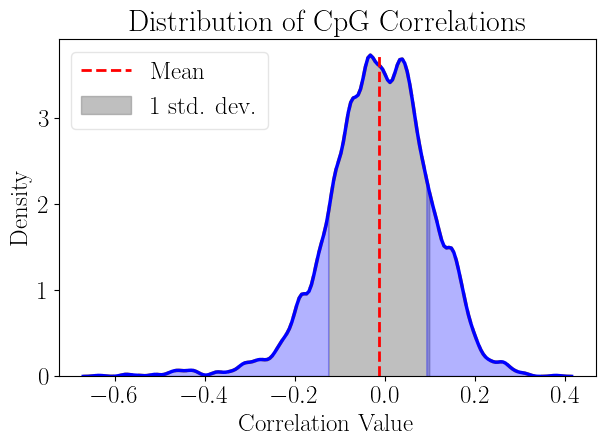

cgi_corr_hor: -0.004280727283126912
cgi_corr_hor: 0.15826696851237987


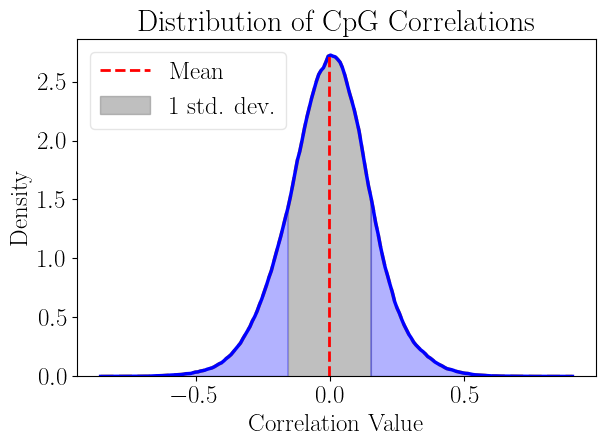

non_cgi_corr_gkm: 0.027528798028509636
non_cgi_corr_gkm: 0.11664849114178256


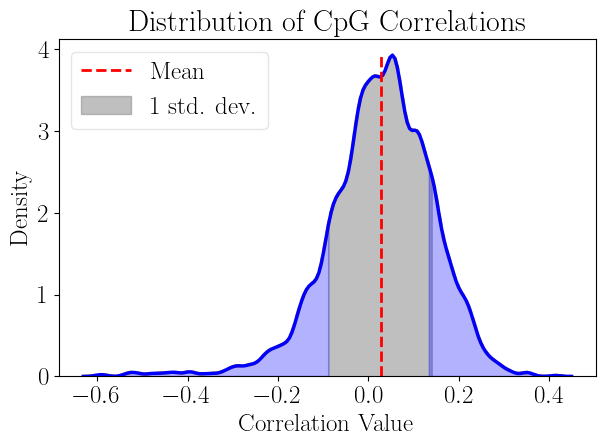

cgi_corr_gkm: -0.006245738018020419
cgi_corr_gkm: 0.16231496072661805


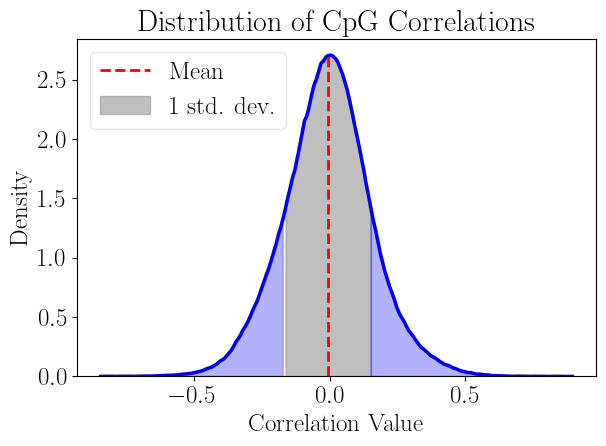

In [76]:
corr_distribution_plot(ch_hor_corrs, "non_cgi_corr_hor")
corr_distribution_plot(cg_hor_corrs, "cgi_corr_hor")
corr_distribution_plot(ch_gkm_corrs, "non_cgi_corr_gkm")
corr_distribution_plot(cg_gkm_corrs, "cgi_corr_gkm")

In [87]:
data.iloc[:, np.where(np.abs(correlations) > 0.5)[0]].to_csv("pruned_data.csv", index=False)
data.iloc[:, np.where(np.abs(correlations) > 0.5)[0]]

,cg07881041,cg23229610,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,cg04118974,...,cg22005990,cg05384275,cg21496658,cg27017993,cg19551589,cg10218605,cg06899844,cg22494081,cg22623303,cg21064505
0,0.915499,0.876176,0.912605,0.115954,0.954318,0.054191,0.943944,0.712612,0.859575,0.674862,...,0.246487,0.021166,0.033645,0.891089,0.042479,0.414216,0.082461,0.951737,0.969829,0.972860
1,0.914907,0.889321,0.905538,0.127752,0.943289,0.046288,0.928080,0.698339,0.872388,0.654277,...,0.199868,0.019622,0.031903,0.886485,0.039433,0.435600,0.099296,0.960945,0.979120,0.969491
2,0.907215,0.901978,0.897193,0.097181,0.939867,0.069327,0.929633,0.684529,0.834511,0.668713,...,0.212202,0.030010,0.028863,0.901537,0.034203,0.395689,0.084558,0.956896,0.977786,0.965334
3,0.906711,0.909132,0.931955,0.099224,0.933466,0.081157,0.927343,0.713424,0.829575,0.635120,...,0.144275,0.020208,0.024360,0.878900,0.063948,0.546385,0.106364,0.938899,0.966568,0.986424
4,0.901751,0.925120,0.916890,0.101209,0.972855,0.048331,0.919047,0.731103,0.827737,0.654966,...,0.161909,0.019448,0.031445,0.890523,0.056097,0.538422,0.090227,0.942994,0.971178,0.967484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.894784,0.893895,0.915422,0.098470,0.944054,0.047113,0.923311,0.687794,0.837862,0.628734,...,0.228716,0.023985,0.052862,0.883416,0.001048,0.447457,0.084172,0.954162,0.973953,0.985909
92,0.908013,0.890609,0.922068,0.096532,0.952696,0.066846,0.921016,0.700539,0.869174,0.660432,...,0.237385,0.025317,0.065192,0.896154,0.050979,0.460084,0.088735,0.955886,0.980833,0.973319
93,0.920081,0.900942,0.925961,0.114469,0.923798,0.074998,0.923445,0.691199,0.830740,0.601039,...,0.188518,0.020496,0.030569,0.902677,0.049682,0.549851,0.104780,0.951692,0.973529,0.981081
94,0.899854,0.890418,0.917419,0.070063,0.938956,0.062476,0.915048,0.697163,0.849340,0.644597,...,0.200786,0.029107,0.032896,0.900179,0.102763,0.523053,0.080351,0.954559,0.974884,0.967593


## Which sites are most age-correlated with p=0.001 significance

In [111]:
def plot_top_correlations( ch_gkm_corrs, cg_gkm_pvalues, type, age, limit = 30, significance = 0.001):
    filtered_sites = {site: ch_gkm_corrs[site] for site in ch_gkm_corrs if cg_gkm_pvalues[site] <= significance}
    sorted_sites = sorted(filtered_sites.items(), key=lambda item: abs(item[1]), reverse=True)
    top_30_sites = sorted_sites[:limit]
    sites, corrs = zip(*top_30_sites)
    plt.figure(figsize=(12, 8))
    plt.barh(sites, corrs, color='skyblue')
    plt.xlabel('Correlation')
    plt.ylabel('Gene Sites')
    plt.title(rf'{type} Sites by Absolute Correlation (p-value $\leq$ 0.001)')
    plt.gca().invert_yaxis()  # Highest correlations on top
    plt.tight_layout()
    plt.savefig(f"{type}_{age}_top_{str(limit)}.jpg")
    plt.show()
    return sites

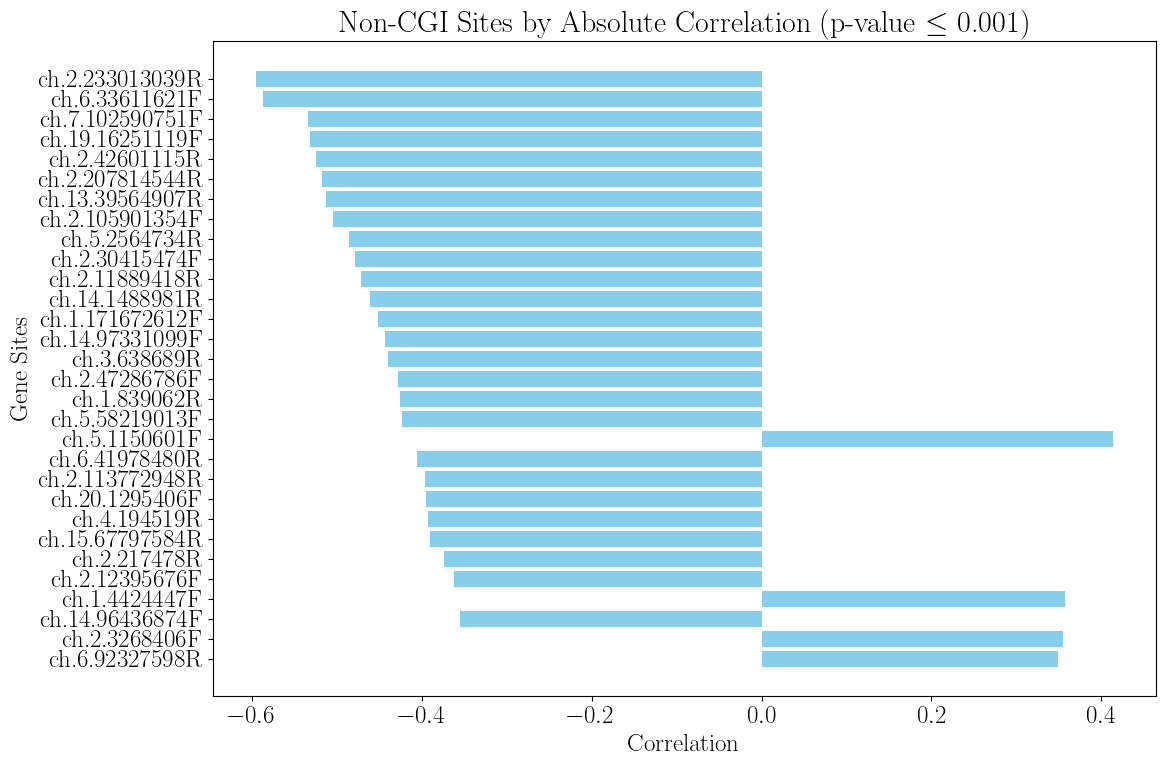

In [112]:
ch_sites_gkm = plot_top_correlations(ch_gkm_corrs, ch_gkm_pvalues, "Non-CGI", "GKM")

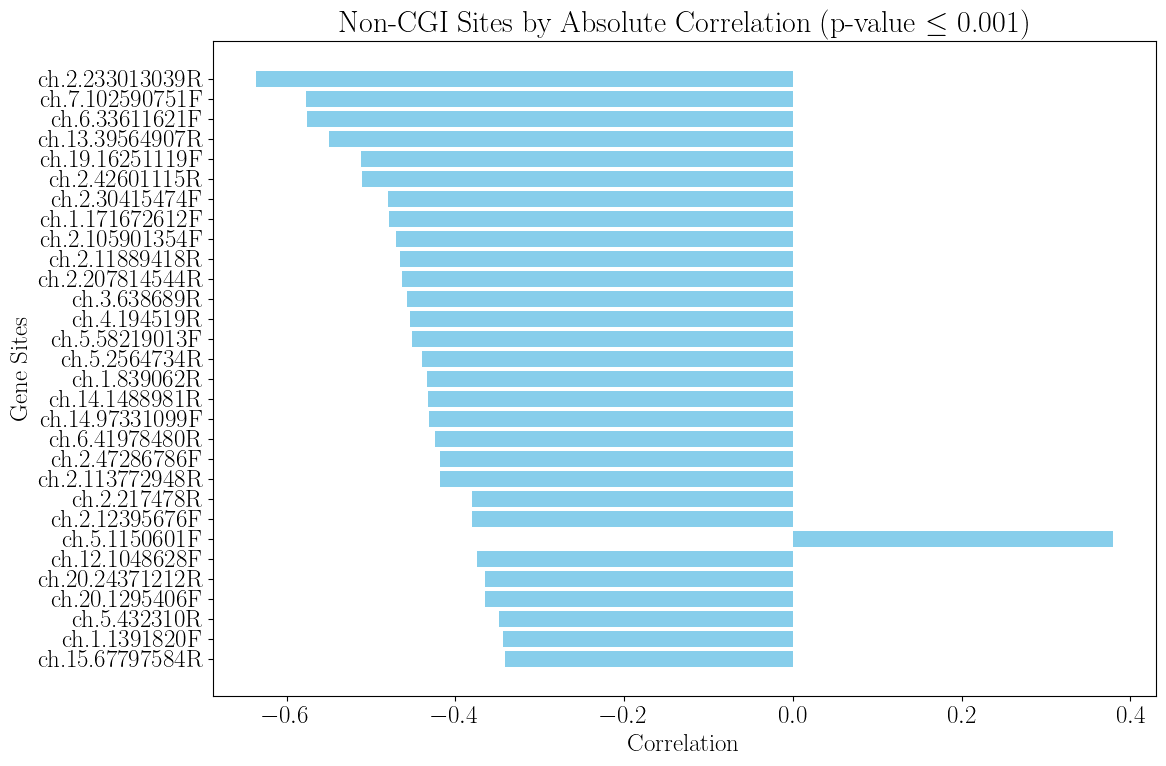

In [114]:
ch_sites_hor = plot_top_correlations(ch_hor_corrs, ch_hor_pvalues, "Non-CGI", "Horvath") # HORVATH

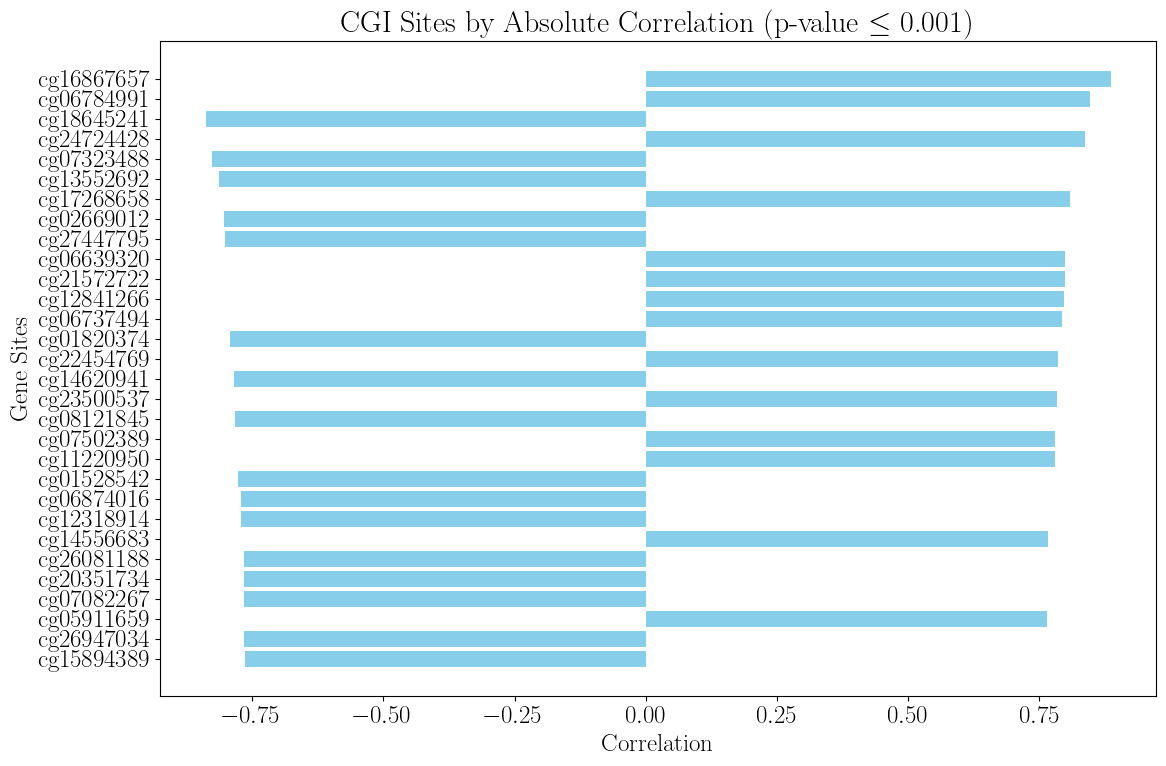

In [115]:
cg_sites_hor = plot_top_correlations(cg_hor_corrs, cg_hor_pvalues, "CGI", "Horvath") # HORVATH

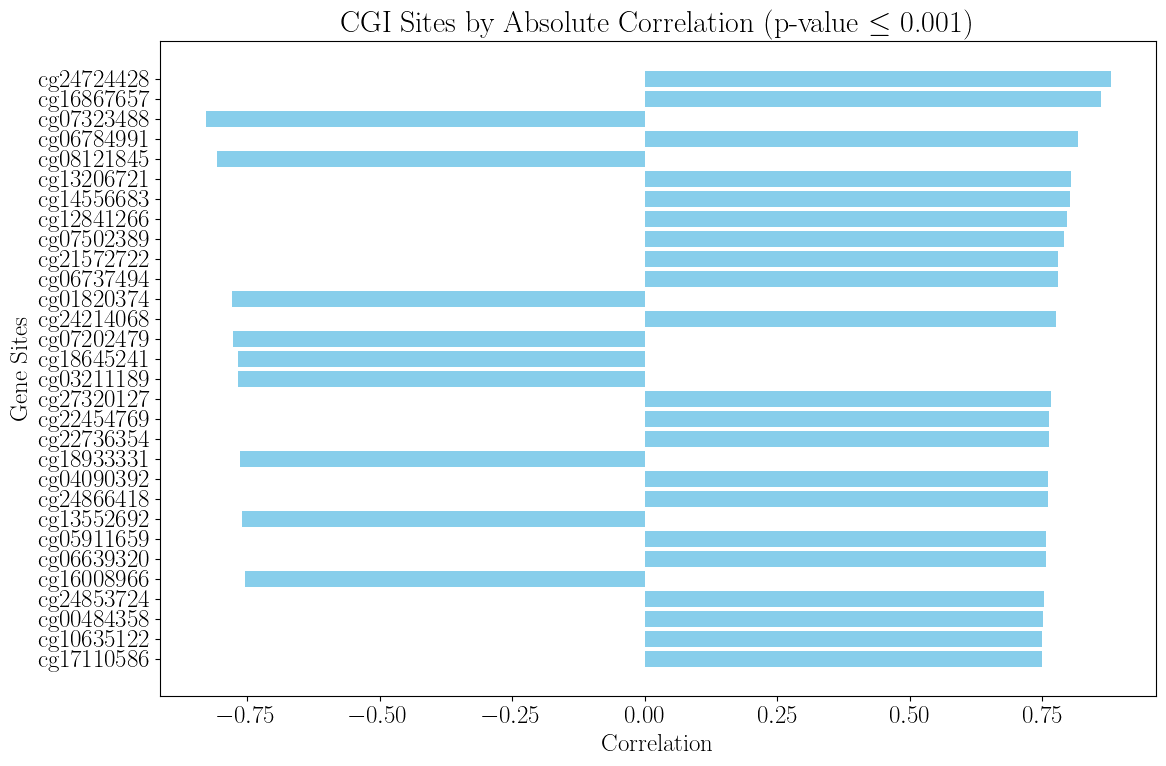

In [116]:
cg_sites_gkm = plot_top_correlations(cg_gkm_corrs, cg_gkm_pvalues, "CGI", "GKM") # GKM

## Two-dimensional PCA by Methylation Sites 

In [117]:
data.columns.values

array(['cg07881041', 'cg23229610', 'cg03513874', ..., 'Timepoint',
       'Score.horvath', 'Score GKM age'], dtype=object)

In [158]:
def plot_pca_by_sites(sites, df, type, age):
    # Handle the age column
    data_sites = df[list(sites)]
    if age == "hor":
        age_data = df['Score.horvath']
    else:
        age_data = df['Score GKM age']
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_sites)
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Age'] = age_data
    
    # Plot PCA results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Age'], cmap="cividis")
    plt.colorbar(scatter, label='Age')
    plt.xlabel('PCA - 1')
    plt.ylabel('PCA - 2')
    plt.title(f'PCA by {type} Sites')
    plt.tight_layout()
    plt.savefig(f"pca_{age}_{type}.jpg")
    plt.show()

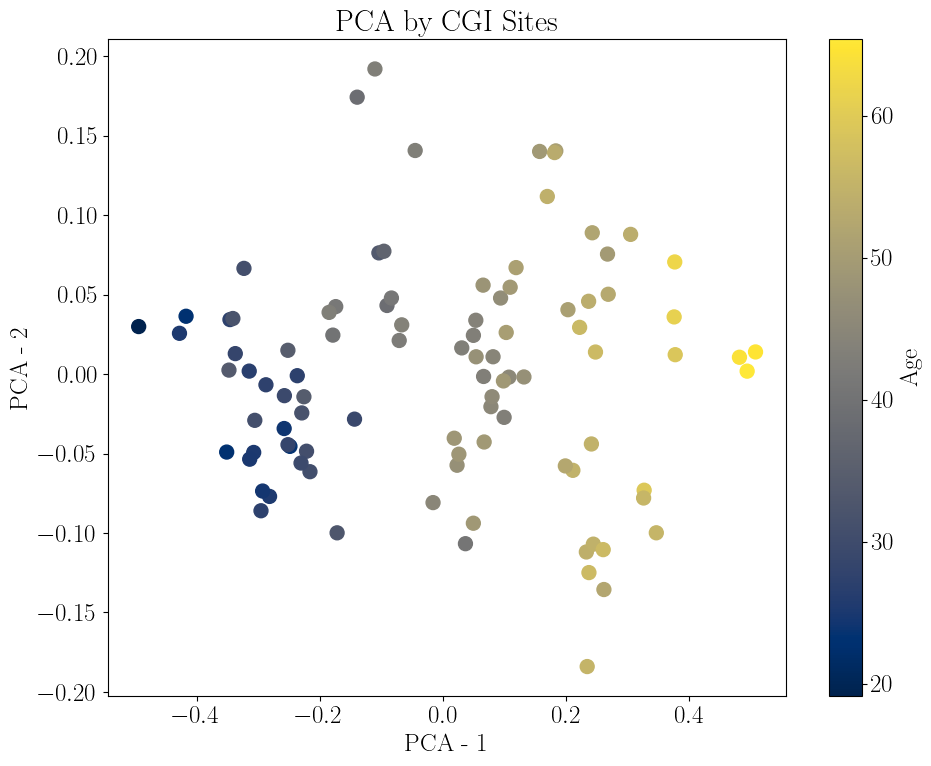

In [163]:
plot_pca_by_sites(cg_sites_hor, data, "CGI", "hor") #HORVATH

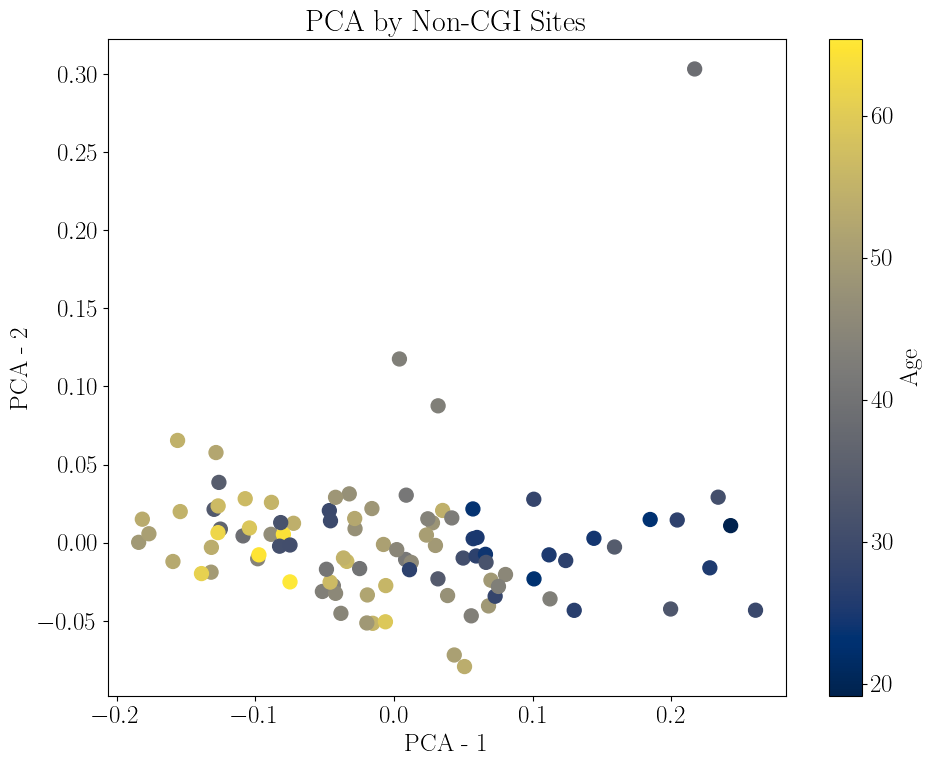

In [164]:
plot_pca_by_sites(ch_sites_hor, data, "Non-CGI", "hor") #HORVATH

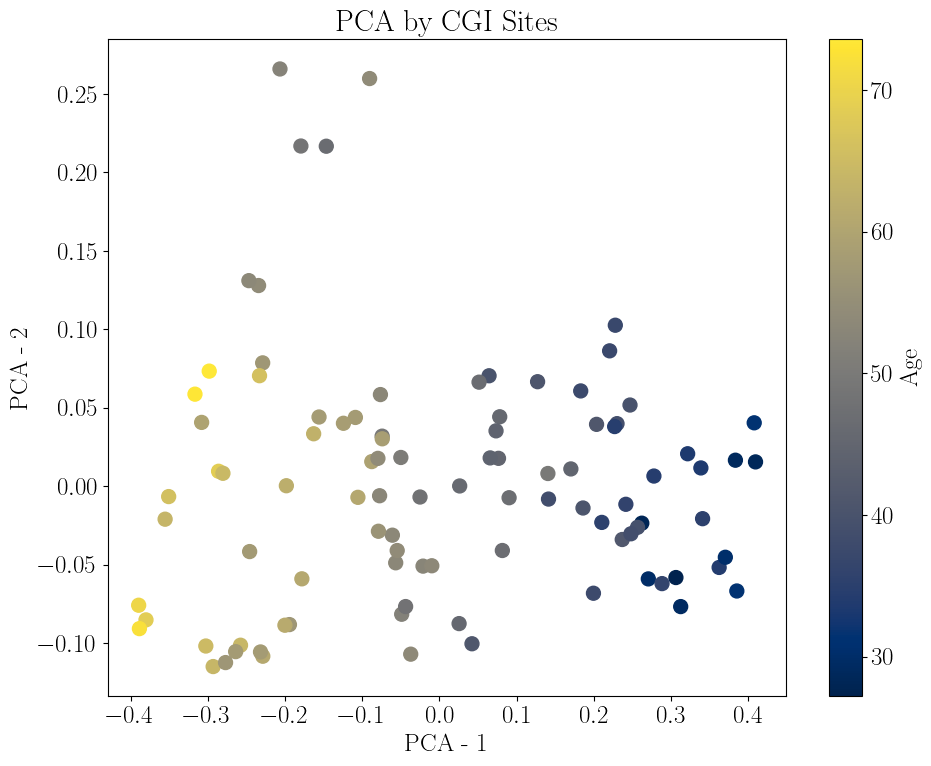

In [165]:
plot_pca_by_sites(cg_sites_gkm, data, "CGI", "GKM") #GKM

In [166]:
plot_pca_by_sites(ch_sites_gkm, data, "Non-CGI", "GKM") #GKM

### Conclusion: differences between methylation-based clustering do not depend significantly on which biological clock is used. However, for CGI sites, Horvath provides marginally better disentanglement. For the case of non-CGI, most often it is decrease in methylation associated with aging, whereas for CGI, change in methylation (positive or negative change) associated with aging.